In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('SBI_Life_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


#### Lets Check the null value

In [4]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

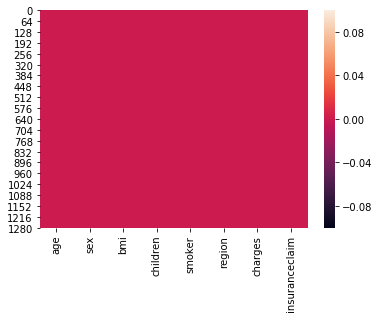

In [5]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [6]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(1338, 8)
(1309, 8)


In [7]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [8]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [9]:
#Lets Again Check the Skewness
data.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null float64
smoker            1338 non-null float64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(4), int64(4)
memory usage: 83.8 KB


In [11]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,0.581751,0.141945,1.515695,9.098828,0.585202
std,14.049960,0.500160,6.098187,0.558325,0.279819,1.104885,0.919379,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,7.023647,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,8.464064,0.000000
50%,39.000000,1.000000,30.400000,0.693147,0.000000,2.000000,9.146658,1.000000
75%,51.000000,1.000000,34.693750,1.098612,0.000000,2.000000,9.719618,1.000000
max,64.000000,1.000000,53.130000,1.791759,0.693147,3.000000,11.063061,1.000000


In [12]:
dfcor = data.corr()
dfcor

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.048406,-0.025019,0.002127,0.527807,0.113723
sex,-0.020856,1.000000,0.046371,0.016296,0.076185,0.004588,0.005644,0.031565
bmi,0.109272,0.046371,1.000000,0.016178,0.003750,0.157566,0.132678,0.384198
children,0.048406,0.016296,0.016178,1.000000,0.013245,0.013722,0.171762,-0.424927
smoker,-0.025019,0.076185,0.003750,0.013245,1.000000,-0.002181,0.665539,0.333261
region,0.002127,0.004588,0.157566,0.013722,-0.002181,1.000000,-0.042683,0.020891
charges,0.527807,0.005644,0.132678,0.171762,0.665539,-0.042683,1.000000,0.232333
insuranceclaim,0.113723,0.031565,0.384198,-0.424927,0.333261,0.020891,0.232333,1.000000


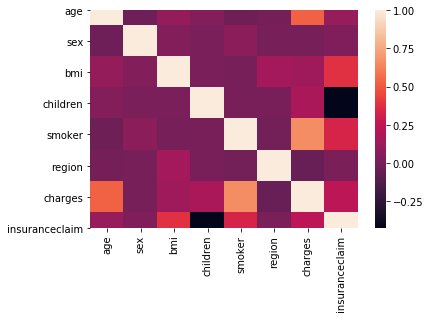

In [13]:
sns.heatmap(dfcor)

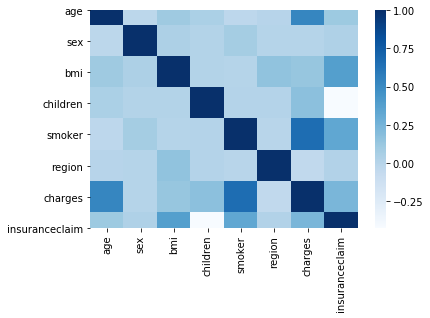

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=False)

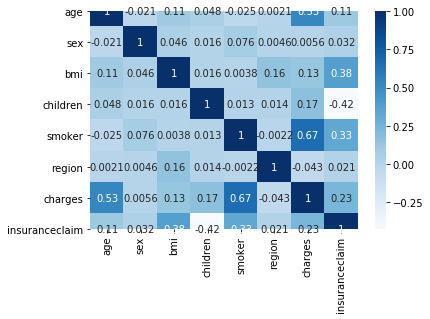

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

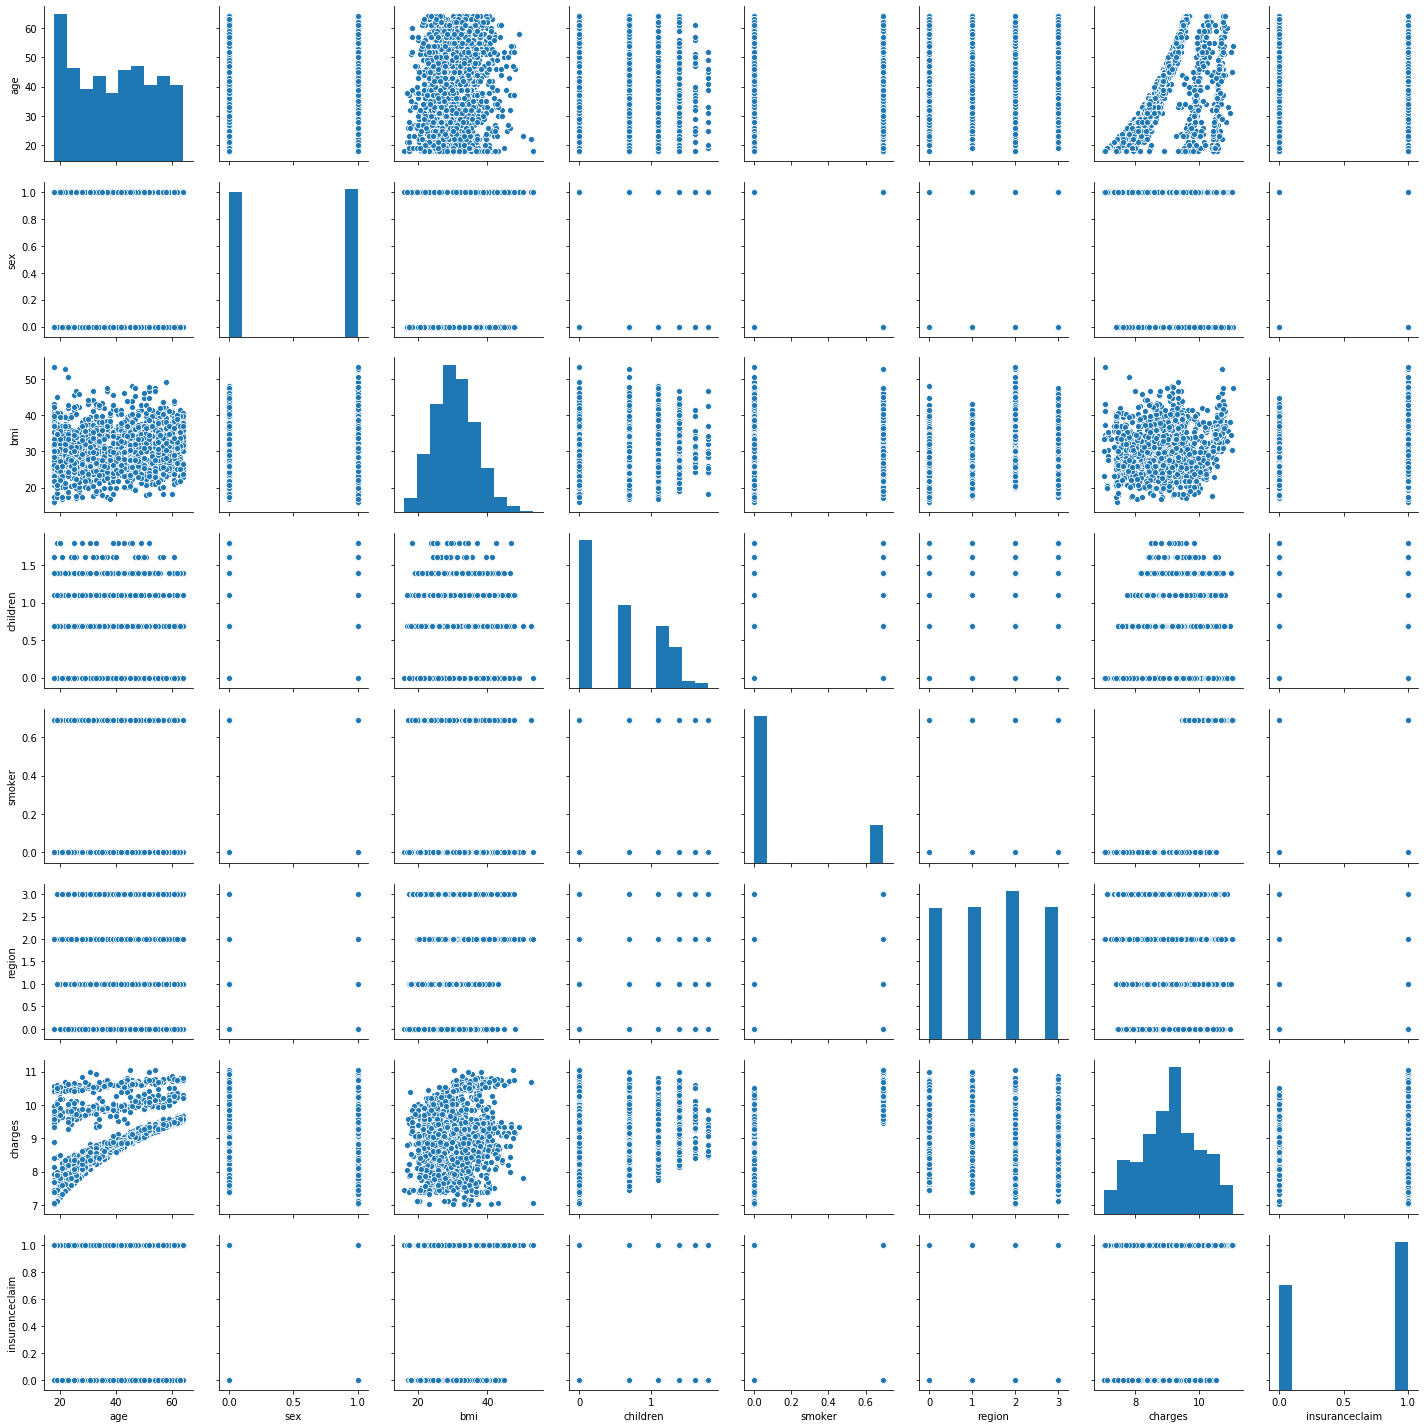

In [16]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### Plotting Boxplot through Iteration

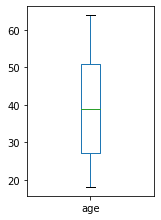

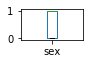

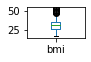

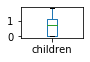

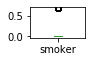

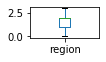

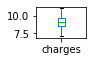

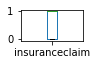

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

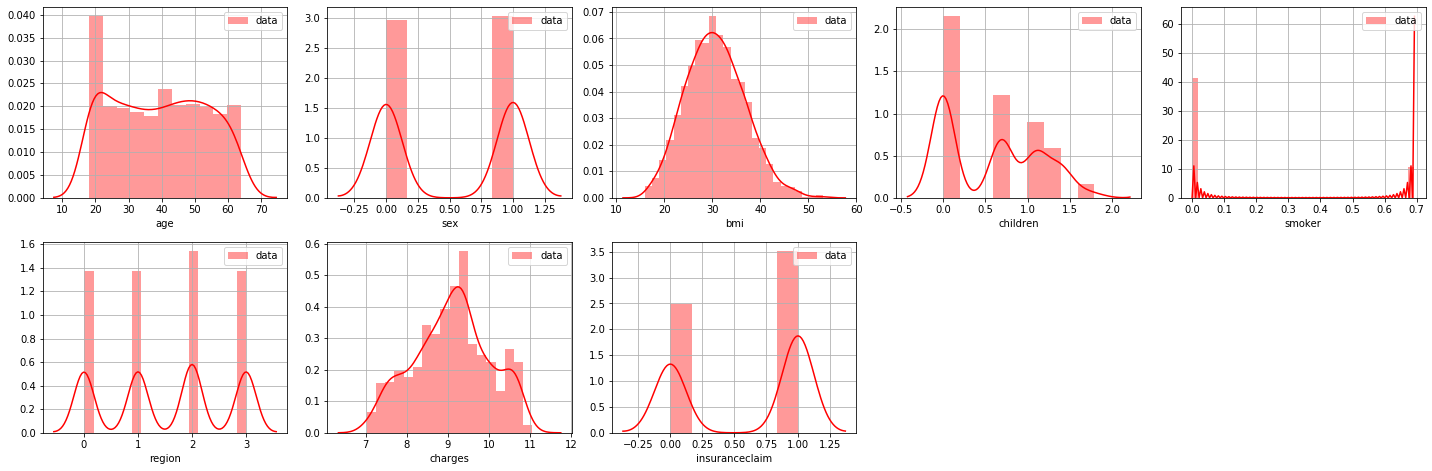

In [18]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [19]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

#### Plotting Data using scatter plot

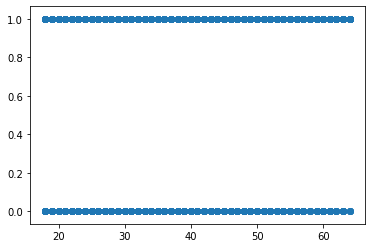

In [20]:
plt.scatter(data['age'],data['insuranceclaim'])

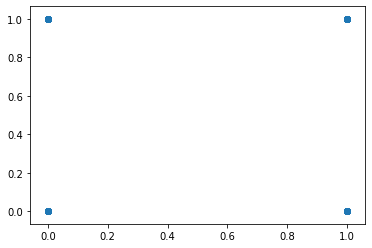

In [21]:
plt.scatter(data['sex'],data['insuranceclaim'])

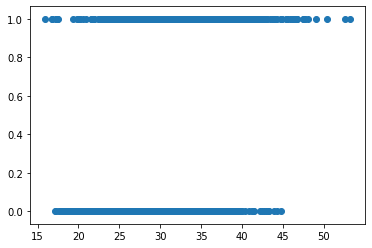

In [22]:
plt.scatter(data['bmi'],data['insuranceclaim'])

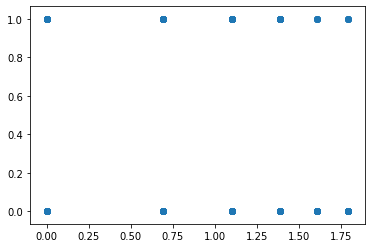

In [23]:
plt.scatter(data['children'],data['insuranceclaim'])

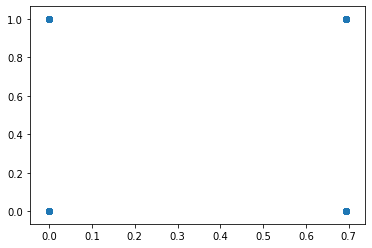

In [24]:
plt.scatter(data['smoker'],data['insuranceclaim'])

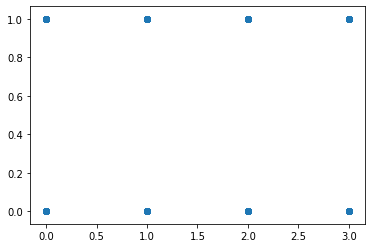

In [25]:
plt.scatter(data['region'],data['insuranceclaim'])

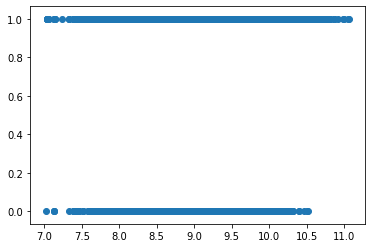

In [26]:
plt.scatter(data['charges'],data['insuranceclaim'])

### Column Plot

In [27]:
collist = data.columns.values
ncols=12
nrows=10

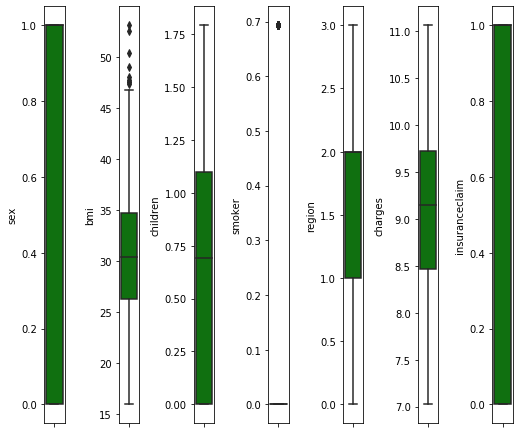

In [28]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Note:: Here we found that there is a negative correlation between children and insurance claim and that is -0.424927. Here chidren represents number of children of the dependent or policy holder. Hence I have decided to drop that column since it will not going to be useful for further analysis.

#### Drop children column

In [29]:
data.drop('children',axis=1,inplace=True)

In [30]:
data

,age,sex,bmi,smoker,region,charges,insuranceclaim
0,19,0,27.900,0.693147,3,9.734236,1
1,18,1,33.770,0.000000,2,7.453882,1
2,28,1,33.000,0.000000,2,8.400763,0
3,33,1,22.705,0.000000,1,9.998137,0
4,32,1,28.880,0.000000,1,8.260455,1
...,...,...,...,...,...,...,...
1333,50,1,30.970,0.000000,1,9.268755,0
1334,18,0,31.920,0.000000,0,7.699381,1
1335,18,0,36.850,0.000000,2,7.396847,1
1336,21,0,25.800,0.000000,3,7.605365,0


### Let's Drop sex and region Column due to Low Correlation with insuranceclaim

In [31]:
data.drop('sex',axis=1,inplace=True)

In [32]:
data.drop('region',axis=1,inplace=True)

In [33]:
data

,age,bmi,smoker,charges,insuranceclaim
0,19,27.900,0.693147,9.734236,1
1,18,33.770,0.000000,7.453882,1
2,28,33.000,0.000000,8.400763,0
3,33,22.705,0.000000,9.998137,0
4,32,28.880,0.000000,8.260455,1
...,...,...,...,...,...
1333,50,30.970,0.000000,9.268755,0
1334,18,31.920,0.000000,7.699381,1
1335,18,36.850,0.000000,7.396847,1
1336,21,25.800,0.000000,7.605365,0


#### Separating X and Y variable

In [34]:
data

,age,bmi,smoker,charges,insuranceclaim
0,19,27.900,0.693147,9.734236,1
1,18,33.770,0.000000,7.453882,1
2,28,33.000,0.000000,8.400763,0
3,33,22.705,0.000000,9.998137,0
4,32,28.880,0.000000,8.260455,1
...,...,...,...,...,...
1333,50,30.970,0.000000,9.268755,0
1334,18,31.920,0.000000,7.699381,1
1335,18,36.850,0.000000,7.396847,1
1336,21,25.800,0.000000,7.605365,0


In [35]:
X = data.drop("insuranceclaim", axis=1)

In [36]:
X

,age,bmi,smoker,charges
0,19,27.900,0.693147,9.734236
1,18,33.770,0.000000,7.453882
2,28,33.000,0.000000,8.400763
3,33,22.705,0.000000,9.998137
4,32,28.880,0.000000,8.260455
...,...,...,...,...
1333,50,30.970,0.000000,9.268755
1334,18,31.920,0.000000,7.699381
1335,18,36.850,0.000000,7.396847
1336,21,25.800,0.000000,7.605365


In [37]:
Y = data["insuranceclaim"]
Y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [38]:
X.shape

(1338, 4)

In [39]:
Y.shape

(1338,)

In [40]:
Y = Y.values.reshape(-1,1)

In [41]:
Y

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [42]:
Y.shape

(1338, 1)

In [43]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [44]:
train_X.shape

(1043, 4)

In [45]:
test_X.shape

(295, 4)

In [46]:
train_Y.shape

(1043, 1)

In [47]:
test_Y.shape

(295, 1)

#### Applying Logistic Regression

In [48]:
lg=LogisticRegression()

In [49]:
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
pred=lg.predict(test_X)
print(pred)

[0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1
 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0
 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1]


In [51]:
print("accuracy score:",accuracy_score(pred,test_Y))

accuracy score: 0.7593220338983051


In [52]:
print(confusion_matrix(test_Y,pred))

[[ 85  42]
 [ 29 139]]


In [53]:
print(classification_report(test_Y,pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       127
           1       0.77      0.83      0.80       168

    accuracy                           0.76       295
   macro avg       0.76      0.75      0.75       295
weighted avg       0.76      0.76      0.76       295



### Using Cross Validation to Check Overfitting,Underfitting and Predict the Result

In [54]:
from sklearn.model_selection import cross_val_score
accuracycvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print(accuracycvlg1)

0.7527347390033957


In [55]:
from sklearn.model_selection import cross_val_score
accuracycvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print(accuracycvlg2)

0.7526841448189762


### Grid Search Cross Validation for Logistic Regression

In [56]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.7574304889741131


In [57]:
lg2=LogisticRegression(C=1,penalty="l2")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

score 0.7593220338983051


### Boost the Dataset by AdaBoost and GradiantBoost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

0.8312559923298178
[0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1
 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1
 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1]


0.752542372881356

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

0.8983700862895494
[0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1
 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1]


0.7966101694915254

### Boosting though GradientBoost Regressor By using Parameters

In [60]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.6658464856099466
R2 sq:  0.6658464856099466
Mean squared error: 0.14
Test Variance score: 0.42


### Lets Visualize the Goodness of the Prediction

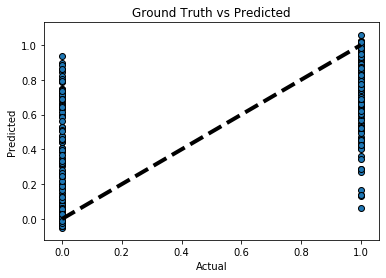

In [62]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Prediction Using Naive Bayes Algo

In [63]:
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.6067796610169491
[[ 40  87]
 [ 29 139]]
              precision    recall  f1-score   support

           0       0.58      0.31      0.41       127
           1       0.62      0.83      0.71       168

    accuracy                           0.61       295
   macro avg       0.60      0.57      0.56       295
weighted avg       0.60      0.61      0.58       295



### Multinomial NB by using Crossval Score

In [64]:
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.6        0.55555556 0.57777778 0.51685393 0.58426966 0.58426966
 0.59550562 0.6741573  0.5505618  0.64044944 0.57303371 0.62921348
 0.56179775 0.62921348 0.57303371]
Mean Scores 0.5897128589263421
Standard deviation 0.03873873081740027
Y Prediction values
[1 1 1 ... 1 1 1]


array([[195, 360],
       [188, 595]], dtype=int64)

### Pediction using Support Vector Machine

In [65]:
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.7322033898305085
[[ 78  49]
 [ 30 138]]
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       127
           1       0.74      0.82      0.78       168

    accuracy                           0.73       295
   macro avg       0.73      0.72      0.72       295
weighted avg       0.73      0.73      0.73       295



### Support Vector Machine by using Crossval Score

In [66]:
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.74253731 0.7761194  0.74626866 0.74157303 0.75655431]
Mean Scores 0.7526105427916596
Standard Deviation 0.012897564577252241
Y Prediction values
[1 1 1 ... 1 0 1]


0.7526158445440957

### Use GridSearchCV for Support Vector Machine

In [67]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.589, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.589, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.591, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.687, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.664, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.683, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.727, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.715, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.687, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.701, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.730, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.727, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.715, total=   0.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.799, total=   0.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.787, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.793, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.761, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [68]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [69]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       127
           1       0.75      0.83      0.79       168

    accuracy                           0.75       295
   macro avg       0.75      0.74      0.74       295
weighted avg       0.75      0.75      0.75       295



#### Boosting through Support Vector Classifier

In [70]:
#from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME.R')

#abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME')

# Train Adaboost Classifer
modelsvboost = abc.fit(train_X,train_Y)

#Predict the response for test dataset
y_pred = modelsvboost.predict(test_X)


print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))

Accuracy: 0.5694915254237288


### Prediction Using DecisionTreeClassifier

In [71]:
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.7966101694915254
[[ 95  32]
 [ 28 140]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       127
           1       0.81      0.83      0.82       168

    accuracy                           0.80       295
   macro avg       0.79      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



### DecisionTreeClassifier by using Crossval Score

In [72]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.81029427 0.76130628 0.7847019  0.83809771 0.81992854]
Mean Scores 0.8028657404956834
Standard Deviation 0.026998990917746376
Y Prediction values
[1 0 0 ... 1 0 1]


array([[429, 126],
       [139, 644]], dtype=int64)

### Using GridSearchCV for DecisionTreeClassifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    4.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [74]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 72, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=72,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [75]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       127
           1       0.79      0.87      0.83       168

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



### Boost Decision Tree Classifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [77]:
predictions = dtbclassifier.predict(test_X)
predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.7457627118644068


In [79]:
confusion_matrix(test_Y, predictions)

array([[ 86,  41],
       [ 34, 134]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [80]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.6779661016949152
[[ 76  51]
 [ 44 124]]
              precision    recall  f1-score   support

           0       0.63      0.60      0.62       127
           1       0.71      0.74      0.72       168

    accuracy                           0.68       295
   macro avg       0.67      0.67      0.67       295
weighted avg       0.68      0.68      0.68       295



### KNN Nearest Neighbor by using Crossval Score 

In [81]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.74074074 0.71111111 0.75555556 0.70895522 0.73880597 0.70676692
 0.7518797  0.72180451 0.72932331 0.69172932]
Mean Scores 0.7256672360835754
Standard Deviation 0.02002175154245157
Y Prediction values
[1 1 0 ... 1 0 1]
y_pred.shape (1338,)


array([[380, 175],
       [190, 593]], dtype=int64)

### Use GridSearchCV for KNN Nearest Neighbor

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [83]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7093560403997297, 0.6797314982751876, 0.744066912052349, 0.7037071019595291, 0.72286478893275, 0.7315373057363348, 0.7363828727906399, 0.7315096553931505, 0.7344689533767204, 0.7305852804153775, 0.7344319677086667, 0.7401546996692627, 0.7507510046587716, 0.7516017639318611, 0.7487909420676411, 0.7411349087805398, 0.7488281055514066, 0.7410982787439099, 0.7458601835058146, 0.7478200682812333, 0.7468590632668303, 0.7430400263167254, 0.7468772004694334, 0.7477924179380491, 0.7506867242789572, 0.7487819623741954, 0.7526469646857996, 0.747838738930972, 0.755531580070415, 0.7516944059177069]


In [84]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [85]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [86]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')


In [87]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [88]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)


{'n_neighbors': 29}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')


In [89]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       127
           1       0.73      0.83      0.77       168

    accuracy                           0.73       295
   macro avg       0.72      0.71      0.71       295
weighted avg       0.72      0.73      0.72       295



#### Bagging of KNN Nearest Neighbor 

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [91]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [92]:
predictions = baggingknn.predict(test_X)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [93]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.7050847457627119


In [94]:
confusion_matrix(test_Y, predictions)

array([[ 78,  49],
       [ 38, 130]], dtype=int64)

### Prediction Using RandomForest Classification

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.7932203389830509
[[ 93  34]
 [ 27 141]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       127
           1       0.81      0.84      0.82       168

    accuracy                           0.79       295
   macro avg       0.79      0.79      0.79       295
weighted avg       0.79      0.79      0.79       295



### RandomForestClassifier Using Cross_Val_Score

In [96]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.85925926 0.82962963 0.81481481 0.80597015 0.82089552 0.86466165
 0.88721805 0.87218045 0.83458647 0.78195489]
Mean Scores 0.8371170879104893
Standard Deviation 0.03134409203873657
Y Prediction values
[1 1 0 ... 1 0 1]
y_pred.shape (1338,)


array([[437, 118],
       [124, 659]], dtype=int64)

### Using GridSearchCV for Random Forest Classifier

In [97]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [98]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [99]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       127
           1       0.81      0.89      0.85       168

    accuracy                           0.82       295
   macro avg       0.82      0.81      0.81       295
weighted avg       0.82      0.82      0.81       295



#### Bagging of Random Forest Classifier 

In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [101]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [102]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.711864406779661


In [104]:
confusion_matrix(test_Y, predictionsrf)

array([[ 74,  53],
       [ 32, 136]], dtype=int64)

#### NOTE::Among all models,rf1 gives the Highest accuracy(83%) so we are going to save this model

In [105]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(rf1,'SBILife.pkl')

['SBILife.pkl']